this is notebook  with autoencoders 

In [3]:
import nltk
nltk.download('punkt')
import pandas as pd 
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aishw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


C:\Users\aishw\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
input1= Input(shape=(5500,))

In [5]:
encoding_dim = 2

In [6]:
encoded = Dense(encoding_dim, activation='relu')(input1)

In [7]:
decoded = Dense(5500, activation='sigmoid')(encoded)

In [8]:
autoencoder = Model(input1, decoded)

In [9]:
encoder = Model(input1, encoded)

In [10]:
encoded_input = Input(shape=(encoding_dim,))

In [11]:
decoder_layer = autoencoder.layers[-1]

In [12]:
#Decoder Model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [13]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [21]:
df = pd.read_csv("data_v2_1096.csv", encoding="utf8")
docs = []
#iterate over every row of the dataframe
for index,row in df.iterrows():
  docs.append(row["sent_text"])

fn = 'glove.6B.50d.txt'
f = open(fn, encoding="utf8")
embeddings_index = dict()
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs

x_train = np.zeros((index+1,5500));
sntidx = 0
for sent in docs:
  tok = nltk.word_tokenize(sent.lower())
  asent = np.zeros((110,50))
  wrds = 0
  for token in tok:
    if token in embeddings_index:
      asent[wrds] = embeddings_index[token]
      wrds += 1
      if wrds == 110:
        break
  #print asent
  x_train[sntidx] = asent.flatten()
  sntidx += 1
x_test = x_train[100:200]
print(x_train.shape)
print(x_test.shape)

(1096, 5500)
(100, 5500)


In [22]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 1096 samples, validate on 100 samples
Epoch 1/50
1096/1096 [==============================] - 1s 1ms/step - loss: 0.6929 - val_loss: 0.6927
Epoch 2/50
1096/1096 [==============================] - 1s 603us/step - loss: 0.6925 - val_loss: 0.6921
Epoch 3/50
1096/1096 [==============================] - 1s 638us/step - loss: 0.6918 - val_loss: 0.6909
Epoch 4/50
1096/1096 [==============================] - 1s 906us/step - loss: 0.6903 - val_loss: 0.6885
Epoch 5/50
1096/1096 [==============================] - 1s 633us/step - loss: 0.6872 - val_loss: 0.6830
Epoch 6/50
1096/1096 [==============================] - 1s 650us/step - loss: 0.6803 - val_loss: 0.6711
Epoch 7/50
1096/1096 [==============================] - 1s 668us/step - loss: 0.6653 - val_loss: 0.6460
Epoch 8/50
1096/1096 [==============================] - 1s 726us/step - loss: 0.6347 - val_loss: 0.5966
Epoch 9/50
1096/1096 [==============================] - 1s 678us/step - loss: 0.5771 - val_loss: 0.5122
Epoch 10/50
1096/10

In [23]:
encoded = encoder.predict(x_test)
decoded = decoder.predict(encoded)

In [25]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

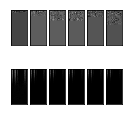

In [31]:
import matplotlib.pyplot as plt

n = 6 # how many digits we will display
plt.figure(figsize=(2, 2))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(110,50))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(110, 50))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()